<a href="https://colab.research.google.com/github/Isha09a/Insurance_charge_prediction/blob/main/Insurancedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np                                                     # Numerical operations
import pandas as pd                                                    # Working with datasets
from scipy.stats import variation                                      # Coefficient of variation
import seaborn as sns                                                  # Data Visualizations
import matplotlib.pyplot as plt                                        # Data Visualizations
from sklearn.preprocessing import MinMaxScaler ,StandardScaler         # For normalizing,standardizing the data
from sklearn.model_selection import train_test_split,cross_val_score   # for splitting thedata into train and test
from sklearn.metrics import mean_absolute_percentage_error as MAPE ,mean_squared_error as MSE   # mean abs percentage error
from sklearn.neighbors import KNeighborsRegressor                      # importing K neighbor regressor
from sklearn.linear_model import LinearRegression                      # importing Linear Regression
import statsmodels.api as sm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading dataset
insurance=pd.read_csv('/content/drive/MyDrive/insurance.csv')

In [5]:
# top rows
insurance.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [6]:
# bottom rows
insurance.tail(2)

,age,sex,bmi,children,smoker,region,charges
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
# information about data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Describe numerical data
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# Describe categorical data
insurance.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [10]:
# checking for null values
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# checking for duplicate values
insurance.duplicated().sum()

1

In [12]:
# drop duplicate columns
insurance.drop_duplicates(inplace=True)

In [13]:
insurance.duplicated().sum()

0

In [14]:
pd.pivot_table(data=insurance,values='charges',index='sex',columns='region',aggfunc='mean')

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264
male,13854.005374,12421.085553,15879.617173,13412.883576


In [15]:
pd.crosstab(index=insurance['smoker'],columns=insurance['region'])

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,266,273,267
yes,67,58,91,58


visualization

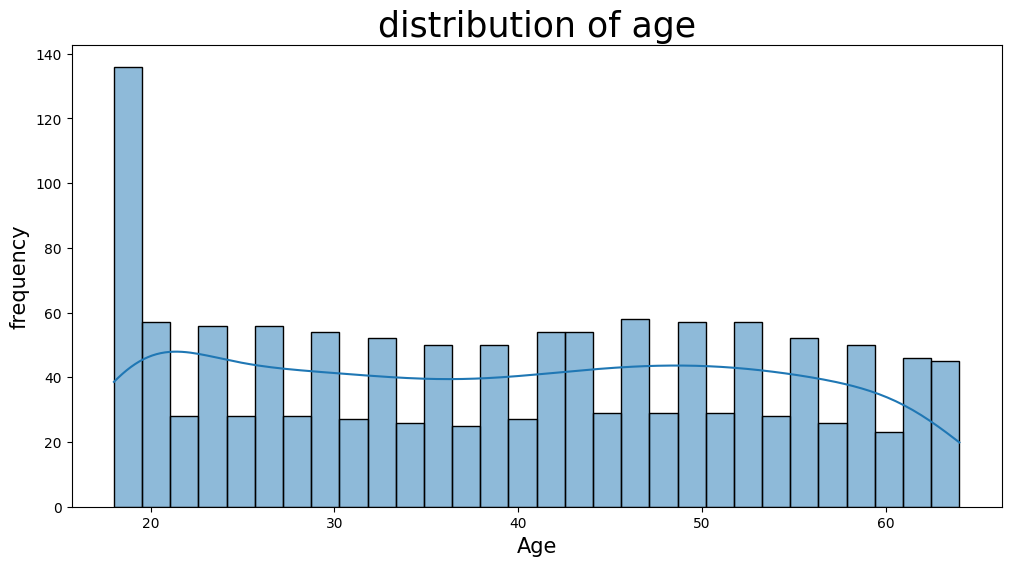

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(x="age",data=insurance,bins=30,kde=True)
plt.title('distribution of age',size=25)
plt.xlabel('Age',size=15)
plt.ylabel('frequency',size=15)
plt.show()

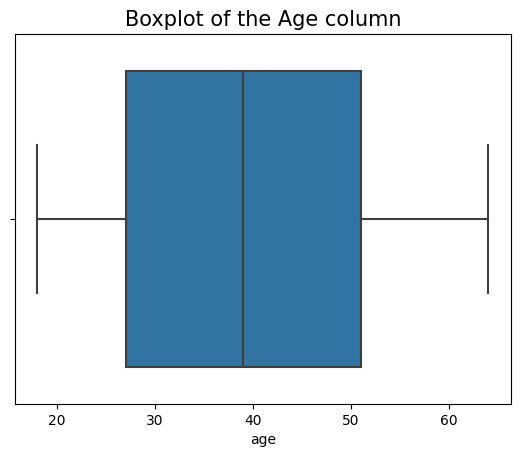

In [17]:
sns.boxplot(x='age',data=insurance)
plt.title('Boxplot of the Age column',size=15)
plt.show()

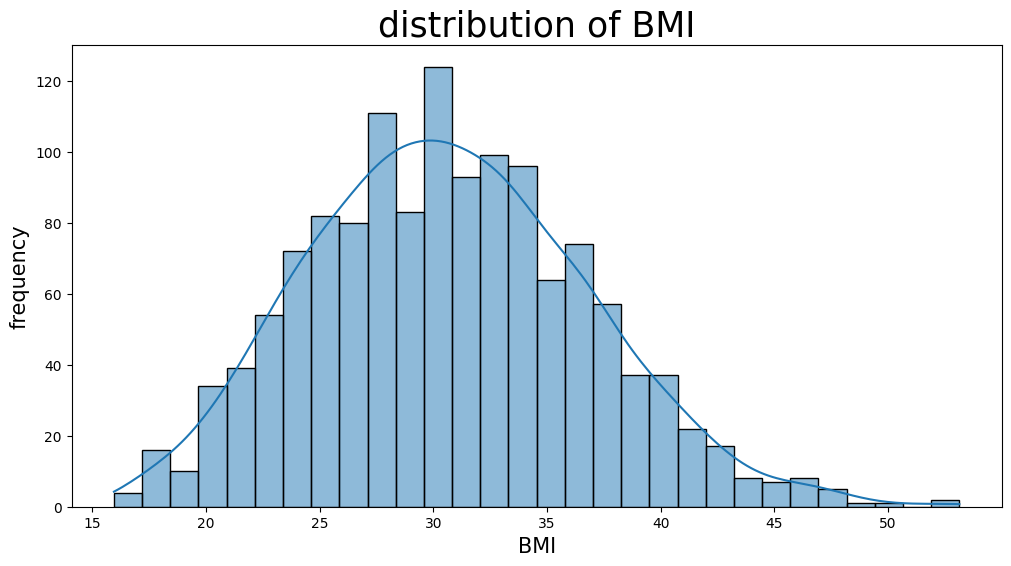

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(x="bmi",data=insurance,bins=30,kde=True)
plt.title('distribution of BMI',size=25)
plt.xlabel('BMI',size=15)
plt.ylabel('frequency',size=15)
plt.show()

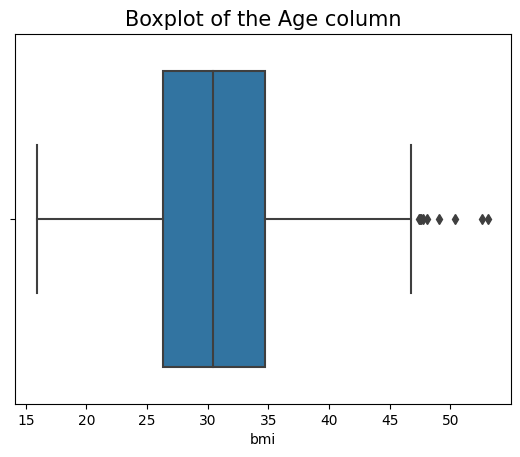

In [19]:
sns.boxplot(x='bmi',data=insurance)
plt.title('Boxplot of the Age column',size=15)
plt.show()

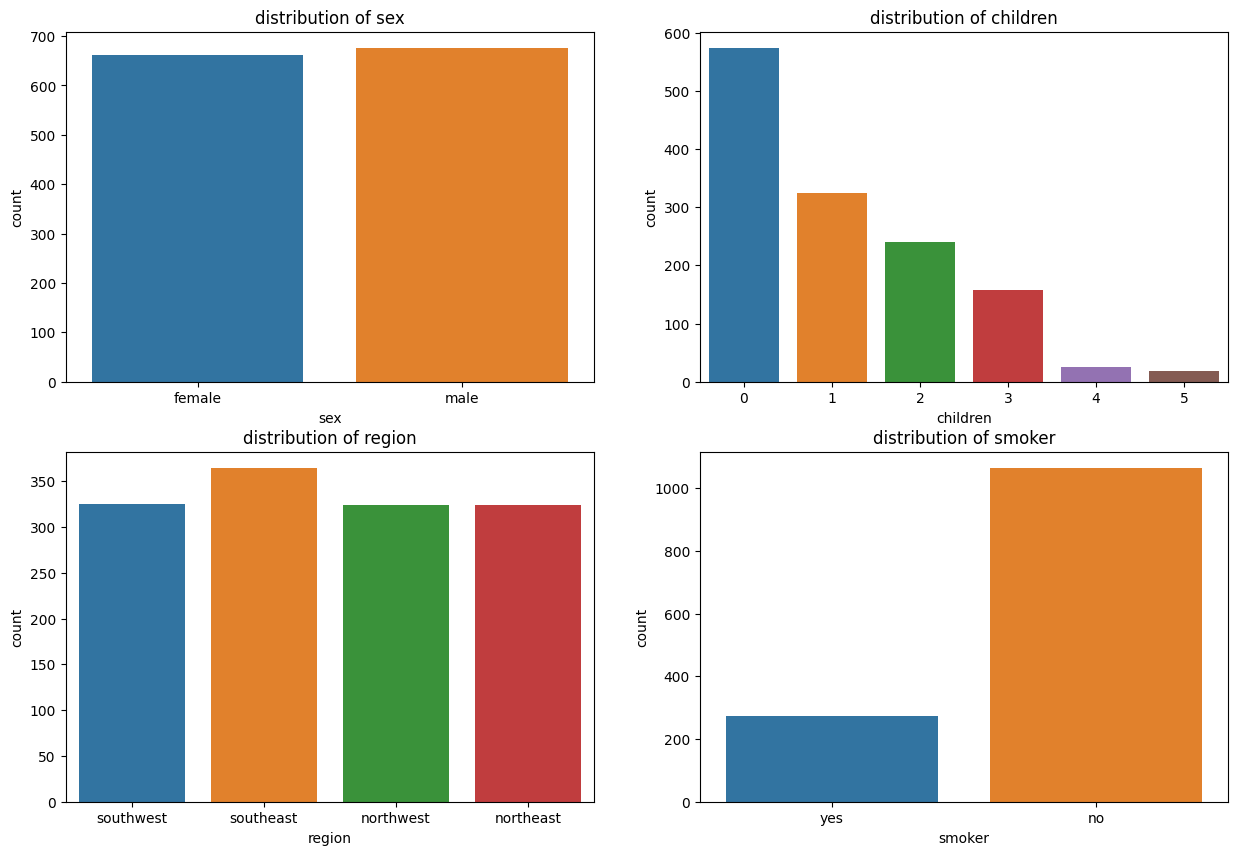

In [20]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x='sex',data=insurance,ax=axes[0,0]).set(title="distribution of sex")
sns.countplot(x='children',data=insurance,ax=axes[0,1]).set(title="distribution of children")
sns.countplot(x='smoker',data=insurance,ax=axes[1,1]).set(title="distribution of smoker")
sns.countplot(x='region',data=insurance,ax=axes[1,0]).set(title="distribution of region")
plt.show()

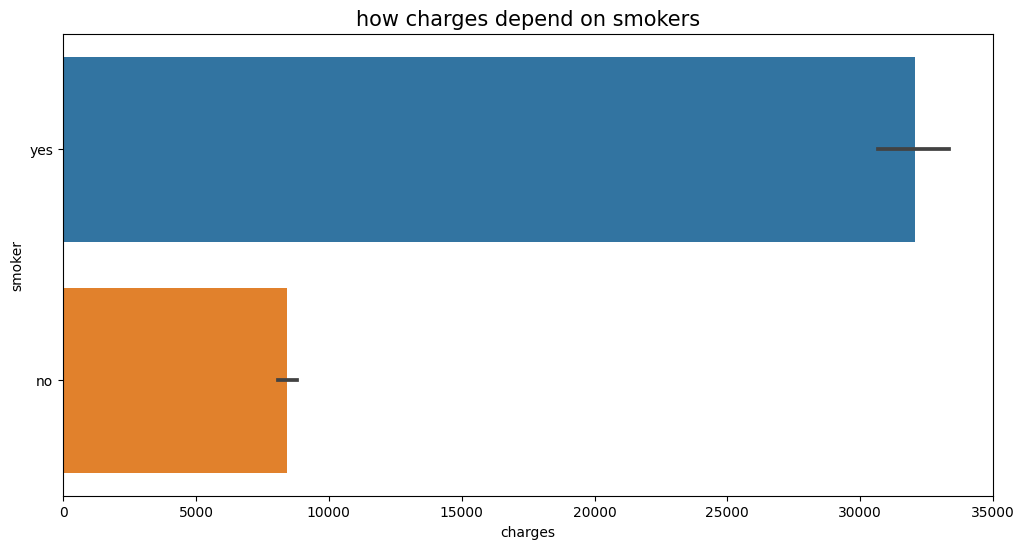

In [21]:
# Does smoking have any effect on charges of insurance
plt.figure(figsize=(12,6))
sns.barplot(y='smoker',x='charges',data=insurance)
plt.title("how charges depend on smokers",size=15)
plt.xlabel('charges',size=10)
plt.ylabel('smoker',size=10)
plt.show()

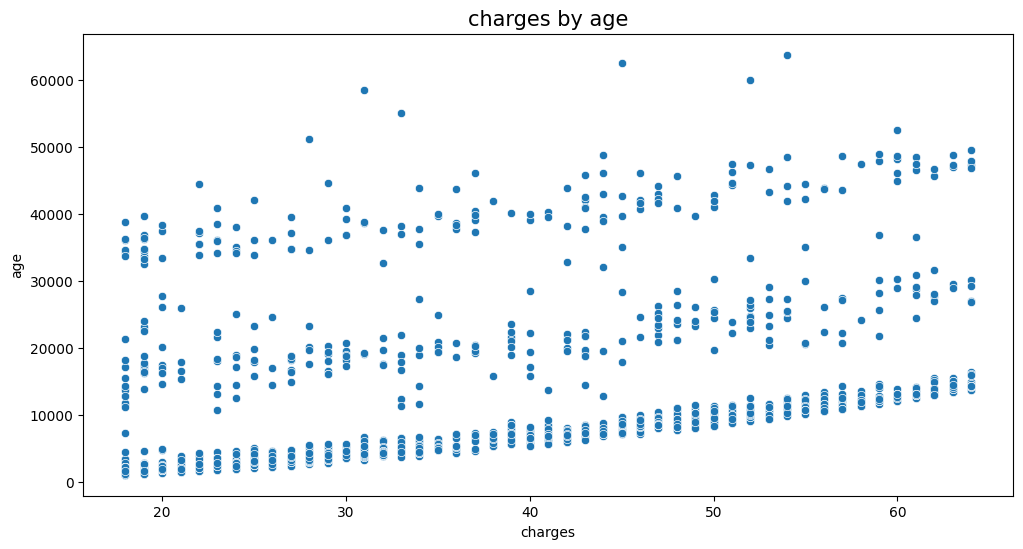

In [22]:
# how are charges distributed by age
plt.figure(figsize=(12,6))
sns.scatterplot(x='age',y='charges',data=insurance)
plt.title("charges by age",size=15)
plt.xlabel('charges',size=10)
plt.ylabel('age',size=10)
plt.show()

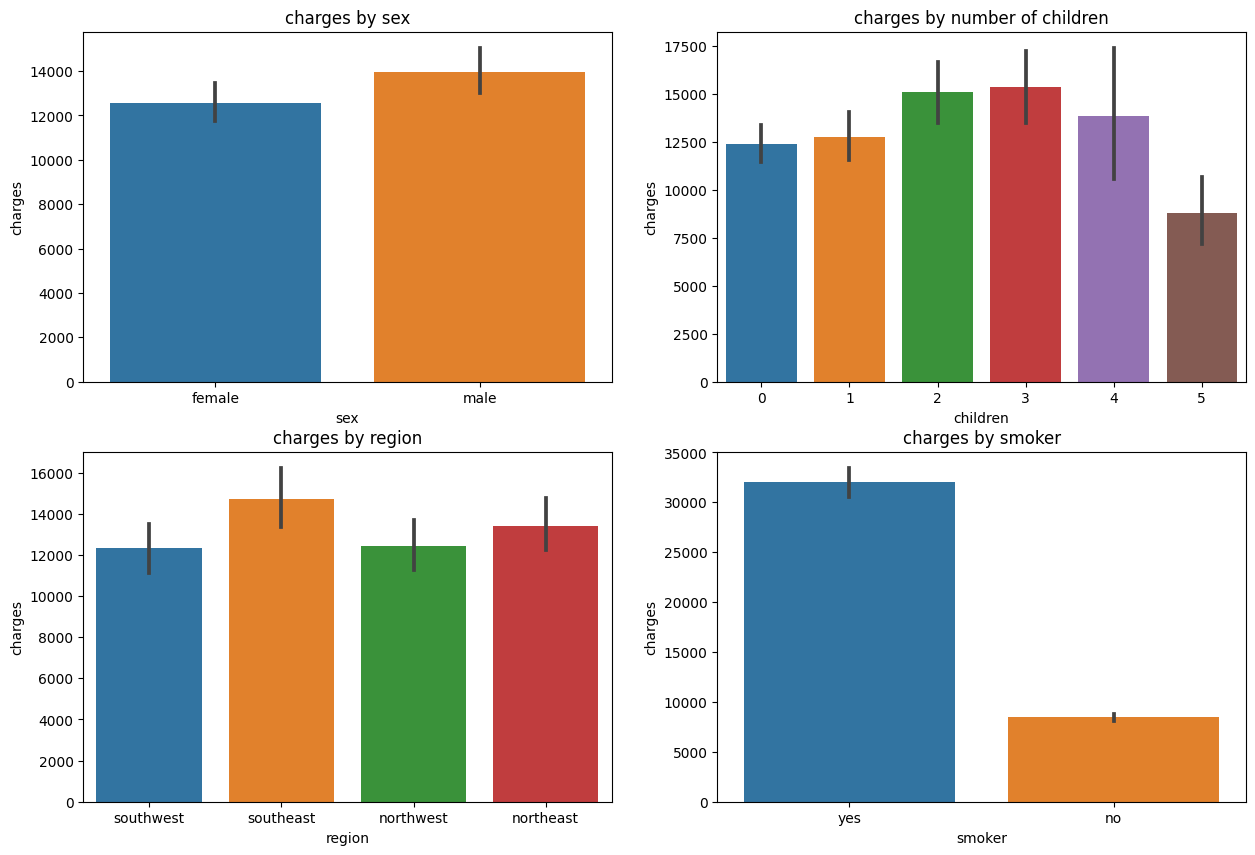

In [23]:
# effect of gender,childern,smoker and region on charges of insurance
fig,axes = plt.subplots(2,2,figsize=(15,10))
sns.barplot(x='sex',y='charges',data=insurance,ax=axes[0,0]).set(title="charges by sex")
sns.barplot(x='children',y='charges',data=insurance,ax=axes[0,1]).set(title="charges by number of children")
sns.barplot(x='smoker',y='charges',data=insurance,ax=axes[1,1]).set(title="charges by smoker")
sns.barplot(x='region',y='charges',data=insurance,ax=axes[1,0]).set(title="charges by region")
plt.show()

In [24]:
# outlier handling:
df_num=insurance[['age','bmi']]
df_num.columns

Index(['age', 'bmi'], dtype='object')

In [25]:
# get thresholds for outlier
Q1=df_num.quantile(0.25)
Q3=df_num.quantile(0.75)
IQR=Q3-Q1
lower_range=Q1-1.5*IQR
upper_range=Q3+1.5*IQR

In [26]:
df=insurance[~((df_num<lower_range) | (df_num>upper_range)).any(axis=1)]

In [27]:
# minmax standardization
df_num=df[['age','bmi']]
ss=MinMaxScaler()
ssdf_num=ss.fit_transform(df_num)

In [28]:
ssdf_num=pd.DataFrame(ssdf_num,columns=df_num.columns,index=df_num.index)

In [29]:
# One-hot encoding:
df_cat=df.drop(['age','bmi','charges'],axis=1)
encoded_df = pd.get_dummies(df_cat, drop_first=False, dtype=int)

In [30]:
encoded_df.head()

,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1,0,0,0,1
1,1,0,1,1,0,0,0,1,0
2,3,0,1,1,0,0,0,1,0
3,0,0,1,1,0,0,1,0,0
4,0,0,1,1,0,0,1,0,0


In [31]:
# Getting independent variables (X)
X=pd.concat([ssdf_num,encoded_df],axis=1)

In [32]:
# Label variable
y=df[['charges']]

In [33]:
# Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [34]:
print(f'dimension of X train data is:{X_train.shape}\
\ndimension of X test data is:{X_test.shape}\
\ndimension of Y train data is:{y_train.shape}\
\ndimension of Y test data is:{y_test.shape}')

dimension of X train data is:(929, 11)
dimension of X test data is:(399, 11)
dimension of Y train data is:(929, 1)
dimension of Y test data is:(399, 1)


## KNN

In [35]:
# Train the model with different K values and calculate MAPE scores using CV
k_values = np.arange(1, 15, 2)
cv_mape_scores = []
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)

    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)

    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = MAPE(y_train, train_pred)
    train_mape_scores.append(train_mape)

    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = MAPE(y_test, test_pred)
    test_mape_scores.append(test_mape)

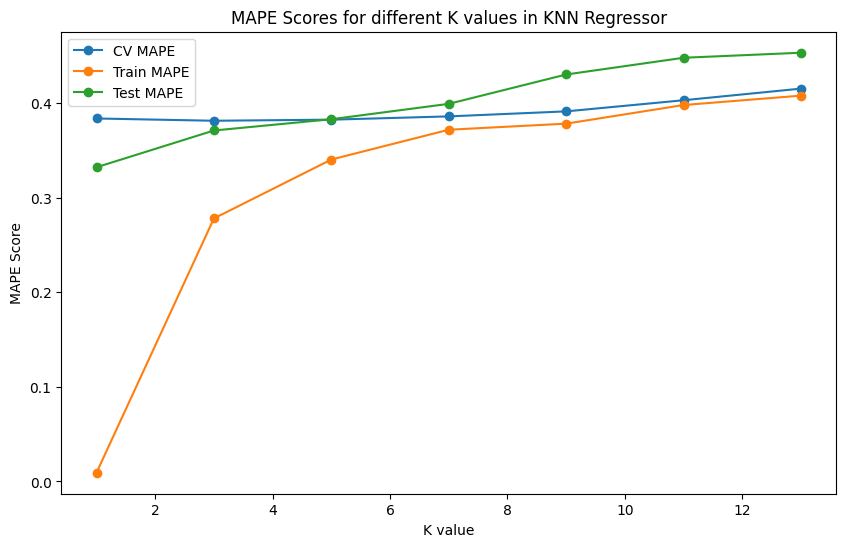

The best K value for CV is 3.


In [36]:
# Plot CV MAPE, Train MAPE, and Test MAPE for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

# Compare the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")

## Linear Regression

In [37]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [38]:
model.score(X_train,y_train)

0.7597267922781475

In [39]:
y_train_pred=model.predict(X_train)
train_RMSE = np.sqrt(MSE(y_train, y_train_pred))
train_RMSE

6011.204795957686

In [40]:
# predict
y_test_pred = model.predict(X_test)
y_test_pred
test_RMSE = np.sqrt(MSE(y_test, y_test_pred))
test_RMSE

6002.0419144227735

In [41]:
model.score(X_test,y_test)

0.718458818797389

In [42]:
model.intercept_, model.coef_

(array([9282.4658008]),
 array([[ 11103.00860571,  11569.99306708,    535.83264983,
             44.77024223,    -44.77024223, -11959.09309916,
          11959.09309916,    792.17739707,    265.20396288,
           -509.46358816,   -547.91777179]]))

In [43]:
# predicted values
yhat_train = model.predict(X_train)

In [44]:
# get R Square from the model
rsq=model.score(X_train,y_train)
rsq

0.7597267922781475

In [45]:
# predict y_test using the model
yhat_test = model.predict(X_test)

In [46]:
# compute MSE on train and test
model_slr_MSE_train = np.mean((y_train - yhat_train)**2)
model_slr_MSE_test = np.mean((y_test - yhat_test)**2)
model_slr_MSE_train, model_slr_MSE_test

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(charges    3.613458e+07
 dtype: float64,
 charges    3.602451e+07
 dtype: float64)

In [47]:
# compute MAPE on train and test
model_slr_MAPE_train = np.mean((abs(y_train - yhat_train)/y_train)*100)
model_slr_MAPE_test = np.mean((abs(y_test - yhat_test)/y_test)*100)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [48]:
model_slr_performance = {'model':"model_slr",'R Sq':rsq,'train_MSE':model_slr_MSE_train,'test_MSE':model_slr_MSE_test,'train_MAPE':model_slr_MAPE_train,'test_MAPE':model_slr_MAPE_test}

In [49]:
pd.DataFrame(model_slr_performance)

,model,R Sq,train_MSE,test_MSE,train_MAPE,test_MAPE
charges,model_slr,0.759727,3.613458e+07,3.602451e+07,43.713024,47.379244


In [50]:
Xrm_train = sm.add_constant(X_train)

In [51]:
Xrm_train.head()

,const,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
989,1.0,0.130435,0.148100,0,1,0,0,1,1,0,0,0
1175,1.0,0.086957,0.361806,0,1,0,1,0,0,0,0,1
1184,1.0,0.108696,0.406950,1,1,0,0,1,0,0,1,0
865,1.0,0.478261,0.452744,2,0,1,1,0,0,0,0,1
861,1.0,0.434783,0.391036,3,1,0,1,0,0,0,0,1


In [52]:
sm_model = sm.OLS(y_train,Xrm_train)
results = sm_model.fit()

In [53]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     361.6
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          6.57e-278
Time:                        10:24:35   Log-Likelihood:                -9403.7
No. Observations:                 929   AIC:                         1.883e+04
Df Residuals:                     920   BIC:                         1.887e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.768e+15   9.93e+14      1.780      0.075   -1.81e+14    3.72e+15
age               1.105e+04    657.805     16.804      0.000    9763.064    1.23e+04
bmi               1.151e+04   1081.917     10.643      0.000    9391.253    1.36e+04
children           521.2939    162.501      3.208      0.001     202.379     840.209
sex_female        5.556e+16   3.12e+16      1.780      0.075   -5.68e+15    1.17e+17
sex_male          5.556e+16   3.12e+16      1.780      0.075   -5.68e+15    1.17e+17
smoker_no        -5.456e+16   3.06e+16     -1.780      0.075   -1.15e+17    5.58e+15
smoker_yes       -5.456e+16   3.06e+16     -1.780      0.075   -1.15e+17    5.58e+15
region_northeast  -2.76e+15   1.55e+15     -1.780      0.075    -5.8e+15    2.82e+14
region_northwest  -2.76e+15   1.55e+15     -1.780      0.075    -5.8e+15    2.82e+14
region_southeast  -2.76e+15   1.55e+15     -1.780      0.075    -5.8e+15    2.82e+14
region_southwest  -2.76e+15   1.55e+15     -1.780      0.075    -5.8e+15    2.82e+14
==============================================================================
Omnibus:                      189.367   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              437.683
Skew:                           1.100   Prob(JB):                     9.08e-96
Kurtosis:                       5.542   Cond. No.                     5.41e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.48e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From the summary above we can see that atleast one of the  Model feature is significant
Conditional number is way higher than 1000 it shows presence of high multicollinearity
as Durbin-Watson statistics in close to 2 there is no autocorrelation in the residuals